In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [3]:

df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


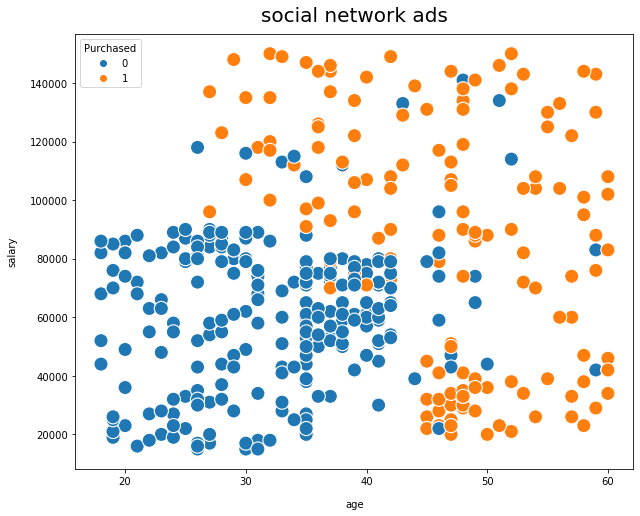

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()

In [10]:
del df['User ID']

In [11]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [13]:
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

**Feature Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Fitting K-NN to the Training set**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**Predicting the Test set results**

In [17]:
knn.score(X_test, y_test)

0.93

In [18]:
x_pred=knn.predict(X_test)

In [19]:
x_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
k=pd.DataFrame(y_test,columns=['Y_test'])
k2=pd.DataFrame(y_pred,columns=['Y_pred'])
final=pd.concat((k,k2),axis=1)
final

NameError: name 'y_pred' is not defined

**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

Text(42.0, 0.5, 'Truth')

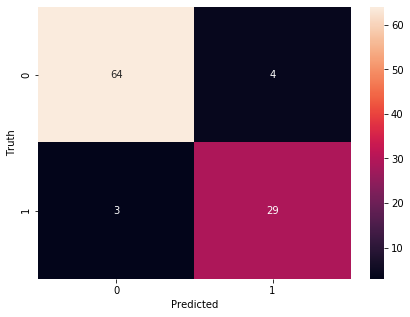

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')